<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/second_hand_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
cars = pd.read_csv('/content/second_hand_cars.csv')
cars.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [30]:
cars.shape

(2500, 16)

In [31]:



cars['Service Record'].nunique()

849

In [32]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

In [33]:
cars.nunique()

,0
Company Name,10
Car Name,10
Variant,9
Fuel Type,3
Tyre Condition,3
Make Year,10
Owner Type,3
Registration Number,2500
Mileage,2483
Price,2495


In [34]:
cars.describe()

,Make Year,Mileage,Price
count,2500.000000,2500.000000,2500.000000
mean,2019.521600,104777.792000,608120.897600
std,2.894146,55544.487467,231056.126713
min,2015.000000,10010.000000,200176.000000
25%,2017.000000,56313.000000,407791.000000
50%,2020.000000,104209.500000,612012.500000
75%,2022.000000,152149.250000,804567.000000
max,2024.000000,199755.000000,999826.000000


In [35]:
import missingno as msno

<Axes: >

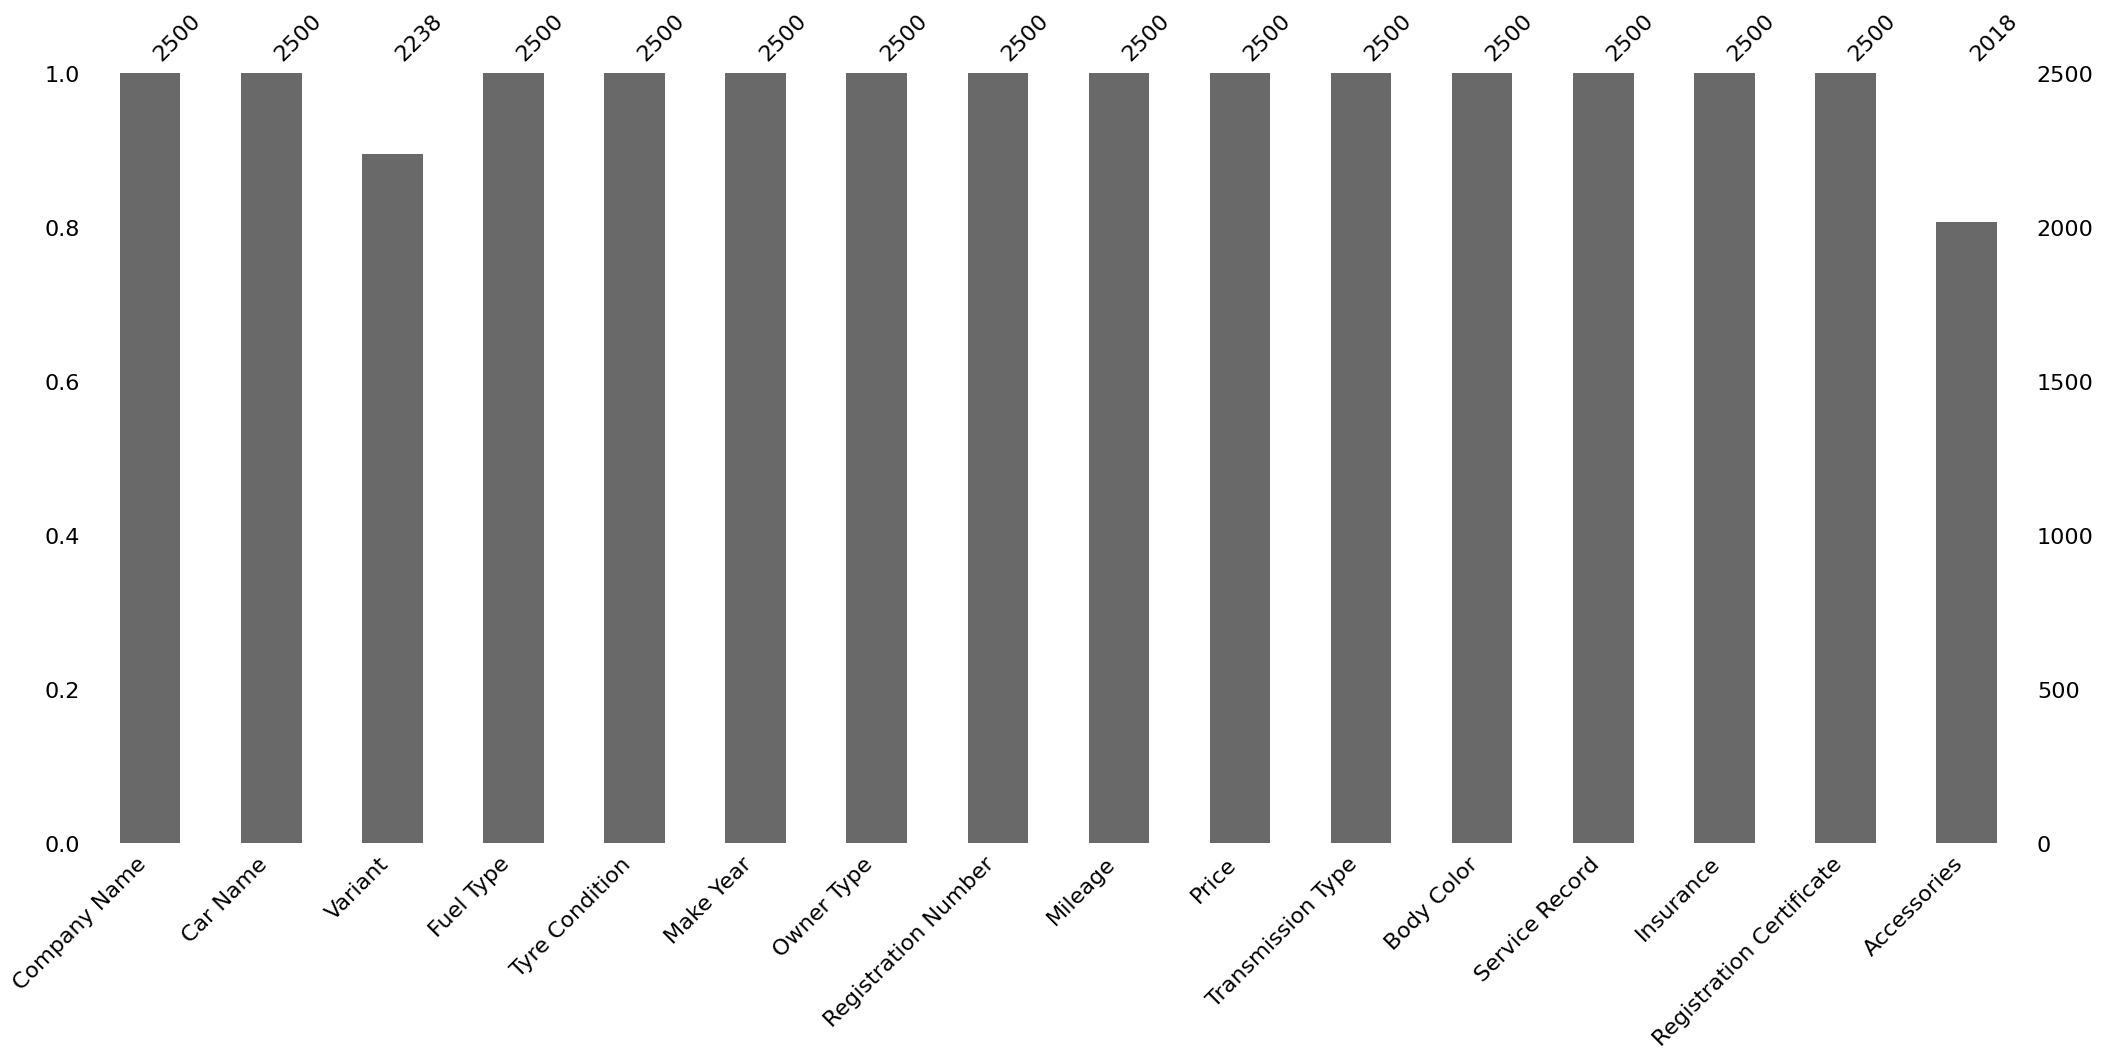

In [36]:
msno.bar(cars)

<Axes: >

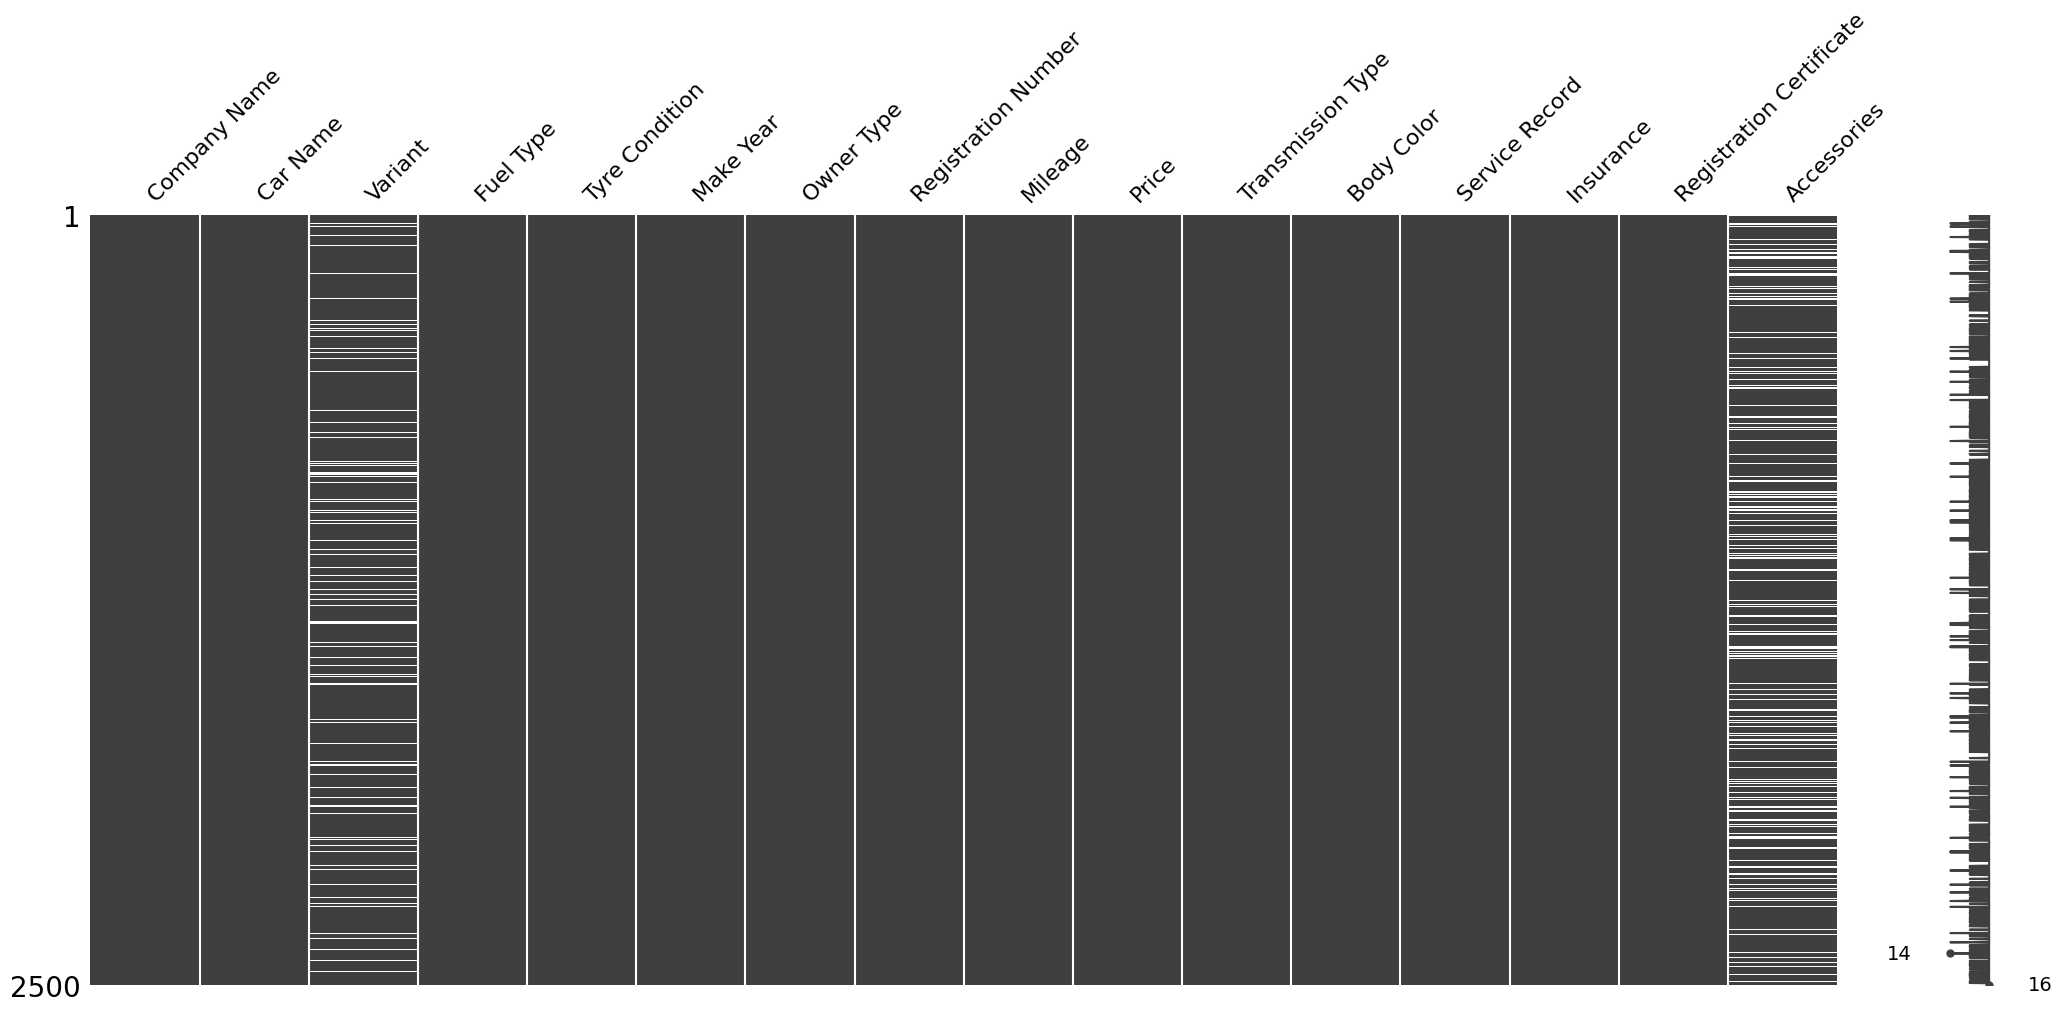

In [37]:
msno.matrix(cars)

<Axes: >

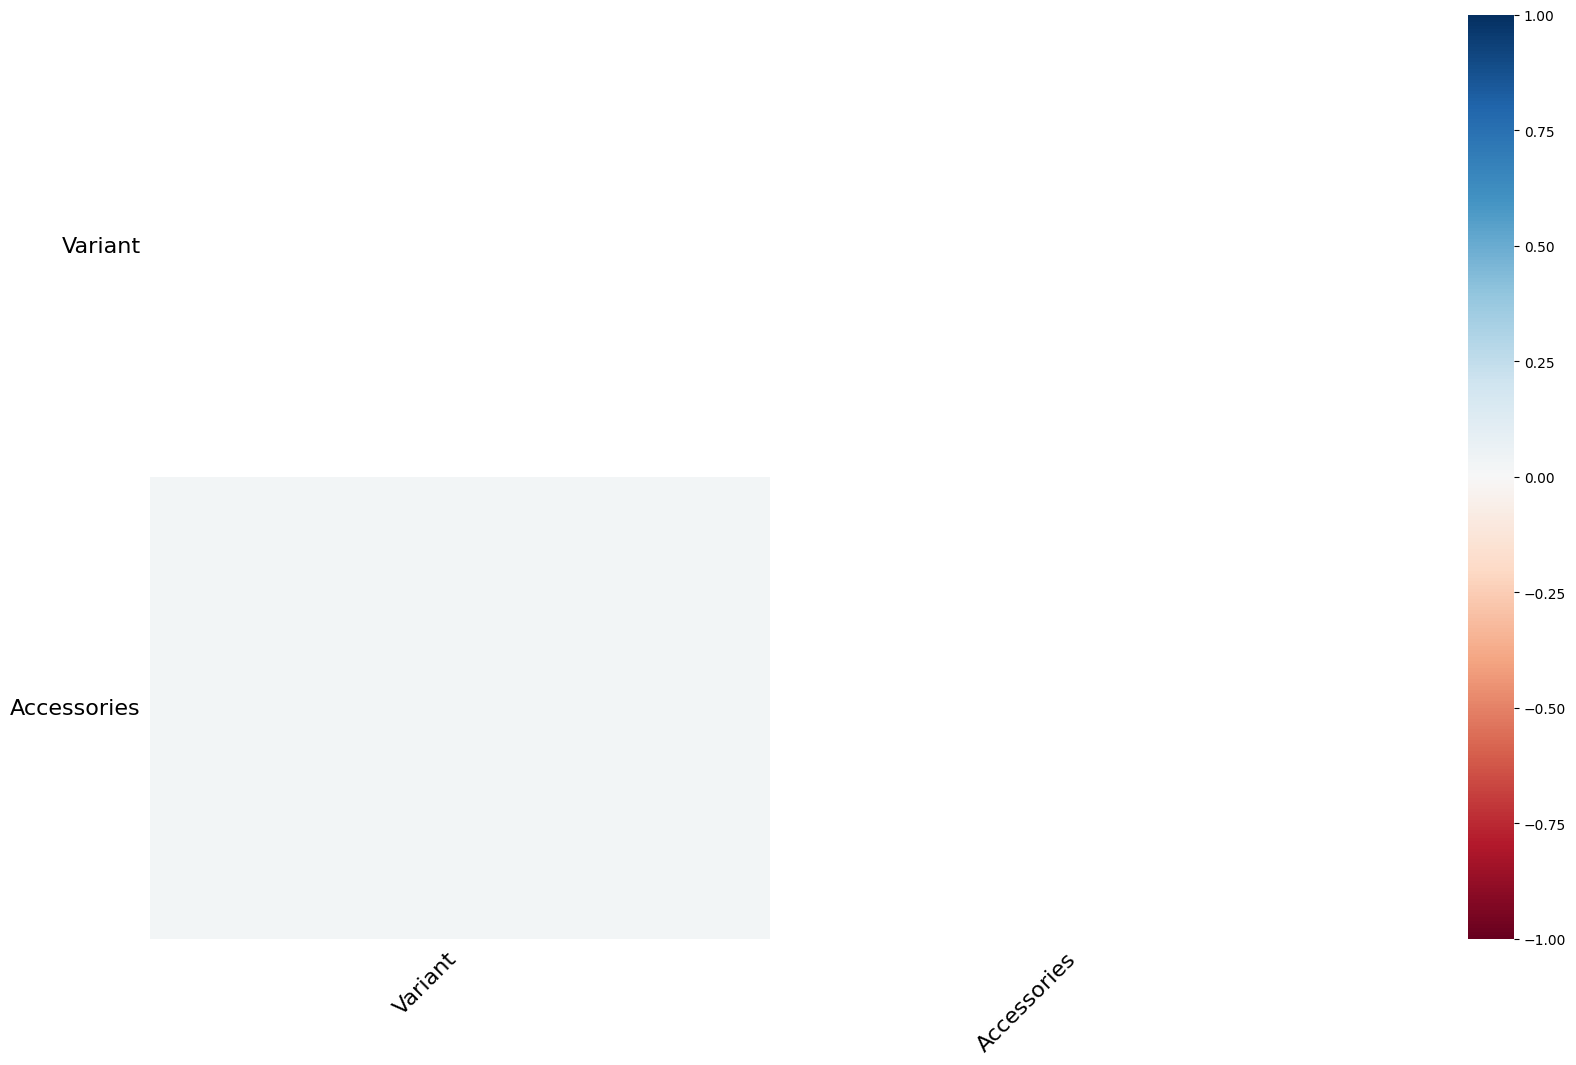

In [38]:
msno.heatmap(cars)

There is no relationship between the variant and accesories. The values are missing completely at random. So I decided to drop them because the values are genunly missing beacuse perhaps during their manufacturing these features were not genuinely added.

In [39]:
#Dropping the missing values
#cars.dropna(inplace=True)

In [40]:
missing_percent = cars.isnull().mean()*100
missing_percent

,0
Company Name,0.00
Car Name,0.00
Variant,10.48
Fuel Type,0.00
Tyre Condition,0.00
Make Year,0.00
Owner Type,0.00
Registration Number,0.00
Mileage,0.00
Price,0.00


In [41]:
cars.isnull().sum()

,0
Company Name,0
Car Name,0
Variant,262
Fuel Type,0
Tyre Condition,0
Make Year,0
Owner Type,0
Registration Number,0
Mileage,0
Price,0


In [42]:

#Dropping the missing values
cars.dropna(inplace=True)

In [43]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1814 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              1814 non-null   object
 1   Car Name                  1814 non-null   object
 2   Variant                   1814 non-null   object
 3   Fuel Type                 1814 non-null   object
 4   Tyre Condition            1814 non-null   object
 5   Make Year                 1814 non-null   int64 
 6   Owner Type                1814 non-null   object
 7   Registration Number       1814 non-null   object
 8   Mileage                   1814 non-null   int64 
 9   Price                     1814 non-null   int64 
 10  Transmission Type         1814 non-null   object
 11  Body Color                1814 non-null   object
 12  Service Record            1814 non-null   object
 13  Insurance                 1814 non-null   object
 14  Registration Certificate  181

In [44]:
cars.shape

(1814, 16)

In [45]:
cars.nunique()

,0
Company Name,10
Car Name,10
Variant,9
Fuel Type,3
Tyre Condition,3
Make Year,10
Owner Type,3
Registration Number,1814
Mileage,1805
Price,1813


In [46]:
#Dropping the Registration Number column
cars.drop('Registration Number', axis=1, inplace=True)

Encoding

In [47]:
cars.describe()

,Make Year,Mileage,Price
count,1814.000000,1814.000000,1814.000000
mean,2019.471334,105207.436053,609941.105292
std,2.884235,54943.614720,228361.992788
min,2015.000000,10010.000000,200176.000000
25%,2017.000000,57837.000000,415149.000000
50%,2019.000000,104339.000000,612868.500000
75%,2022.000000,151121.750000,801862.000000
max,2024.000000,199755.000000,999826.000000


<ipython-input-48-1ee9bb64d2b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['Price'])


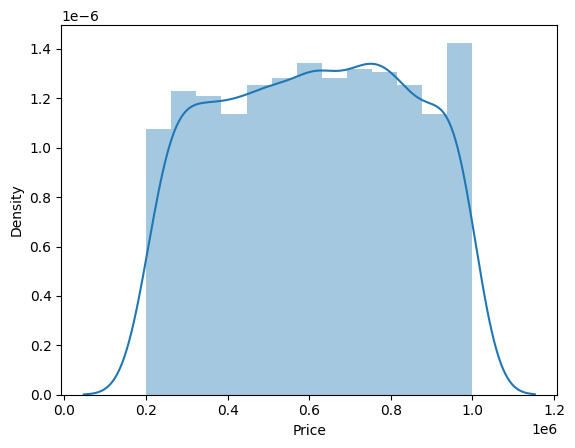

In [48]:
sns.distplot(cars['Price'])
plt.show()

In [49]:
def map_service_record(record):
  if 'Major Service at' in record:
    return 'Partial'
  elif 'No Service Record' in record:
    return 'No'
  elif 'Full Service History':
    return 'Full'
  else:
    return record

#Apply the apping function
cars['Service Record'] = cars['Service Record'].apply(map_service_record)
print(cars)

       Company Name Car Name   Variant Fuel Type     Tyre Condition  \
0     Maruti Suzuki    Cruze        EX       CNG  Needs Replacement   
3            Nissan   Seltos  Highline    Diesel               Used   
4         Chevrolet     Kwid  Highline    Petrol               Used   
5        Volkswagen    Cruze        LE    Petrol                New   
8        Volkswagen     Kwid       ZXI    Petrol                New   
...             ...      ...       ...       ...                ...   
2495         Toyota  Elantra       RXE    Petrol                New   
2496            Kia    Sunny        LE       CNG  Needs Replacement   
2497         Nissan    Sunny       RXE    Diesel               Used   
2498          Honda    Swift        XL       CNG  Needs Replacement   
2499        Renault     Kwid        GT    Diesel  Needs Replacement   

      Make Year Owner Type  Mileage   Price      Transmission Type Body Color  \
0          2018     Second    52798  759107                 Manual

In [50]:
cars['Service Record'].value_counts()

,count
Service Record,
No,629
Partial,614
Full,571


In [51]:
categorical_columns = ['Company Name', 'Car Name', 'Variant', 'Fuel Type',
                       'Tyre Condition', 'Owner Type', 'Transmission Type',
                       'Body Color', 'Service Record', 'Insurance',
                       'Registration Certificate']

#Encoding categorical columns
cars_encoded = pd.get_dummies(cars, columns = categorical_columns, drop_first=True)

from sklearn.feature_extraction.text import CountVectorizer

#Initalize the CountVectorizer for the 'Accesories' column
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','))

#Fit and transform the 'Accesories' column
accessories_encoded = vectorizer.fit_transform(cars['Accessories'])

#Convert to Dataframe
accessories_df = pd.DataFrame(accessories_encoded.toarray(), columns = vectorizer.get_feature_names_out())

#Reset indices to ensure proper alignment
cars_encoded = cars_encoded.reset_index(drop=True)
accessories_df = accessories_df.reset_index(drop=True)

#Combine with rhe encoded Datafeame
cars_combined = pd.concat([cars_encoded, accessories_df], axis=1)

#Drop the original 'Accesories' column
cars_combined.drop('Accessories', axis=1, inplace=True)
cars_combined

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,Make Year,Mileage,Price,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,Company Name_Nissan,Company Name_Renault,...,alloy wheels,gps,leather seats,music system,sunroof,alloy wheels,gps,leather seats,music system,sunroof
0,2018,52798,759107,False,False,False,False,True,False,False,...,1,0,0,0,1,0,0,0,1,0
1,2024,70370,483152,False,False,False,False,False,True,False,...,1,0,0,0,0,0,0,0,1,0
2,2018,85852,712961,False,False,False,False,False,False,False,...,0,0,0,1,0,0,1,0,0,0
3,2021,28516,209930,False,False,False,False,False,False,False,...,0,0,1,1,0,0,0,0,0,1
4,2022,155320,596554,False,False,False,False,False,False,False,...,0,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,2015,171112,643581,False,False,False,False,False,False,False,...,0,0,0,0,1,0,0,0,1,0
1810,2024,93545,889661,False,False,False,True,False,False,False,...,0,1,0,0,0,0,0,0,1,0
1811,2022,47285,327520,False,False,False,False,False,True,False,...,0,0,0,0,1,1,0,0,0,0
1812,2019,67437,348921,False,True,False,False,False,False,False,...,1,0,0,1,1,0,0,1,0,0


In [52]:
#Identify boolean columns
boolean_columns = cars_combined.select_dtypes(include=['bool']).columns

#Convert boolean columns to integer
cars_combined[boolean_columns] = cars_combined[boolean_columns].astype(int)

cars_combined

,Make Year,Mileage,Price,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,Company Name_Nissan,Company Name_Renault,...,alloy wheels,gps,leather seats,music system,sunroof,alloy wheels,gps,leather seats,music system,sunroof
0,2018,52798,759107,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,2024,70370,483152,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,2018,85852,712961,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,2021,28516,209930,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,2022,155320,596554,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,2015,171112,643581,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1810,2024,93545,889661,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1811,2022,47285,327520,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1812,2019,67437,348921,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0


In [53]:
cars.columns

Index(['Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
       'Make Year', 'Owner Type', 'Mileage', 'Price', 'Transmission Type',
       'Body Color', 'Service Record', 'Insurance', 'Registration Certificate',
       'Accessories'],
      dtype='object')

In [54]:
cars_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 58 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Make Year                                1814 non-null   int64
 1   Mileage                                  1814 non-null   int64
 2   Price                                    1814 non-null   int64
 3   Company Name_Ford                        1814 non-null   int64
 4   Company Name_Honda                       1814 non-null   int64
 5   Company Name_Hyundai                     1814 non-null   int64
 6   Company Name_Kia                         1814 non-null   int64
 7   Company Name_Maruti Suzuki               1814 non-null   int64
 8   Company Name_Nissan                      1814 non-null   int64
 9   Company Name_Renault                     1814 non-null   int64
 10  Company Name_Toyota                      1814 non-null   int64
 11  Comp

**Feature Scaling**

In [55]:
X = cars_combined.drop('Price', axis=1)
y = cars_combined['Price']

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Convert scaled Features array back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,Make Year,Mileage,Company Name_Ford,Company Name_Honda,Company Name_Hyundai,Company Name_Kia,Company Name_Maruti Suzuki,Company Name_Nissan,Company Name_Renault,Company Name_Toyota,...,alloy wheels,gps,leather seats,music system,sunroof,alloy wheels,gps,leather seats,music system,sunroof
0,-0.510270,-0.954140,-0.319477,-0.353005,-0.31421,-0.347051,3.031668,-0.357924,-0.32676,-0.333946,...,1.544127,-0.673443,-0.668260,-0.675173,1.475426,-0.47069,-0.519912,-0.520767,2.030836,-0.495862
1,1.570577,-0.634233,-0.319477,-0.353005,-0.31421,-0.347051,-0.329851,2.793891,-0.32676,-0.333946,...,1.544127,-0.673443,-0.668260,-0.675173,-0.677770,-0.47069,-0.519912,-0.520767,2.030836,-0.495862
2,-0.510270,-0.352375,-0.319477,-0.353005,-0.31421,-0.347051,-0.329851,-0.357924,-0.32676,-0.333946,...,-0.647615,-0.673443,-0.668260,1.481102,-0.677770,-0.47069,1.923404,-0.520767,-0.492408,-0.495862
3,0.530153,-1.396206,-0.319477,-0.353005,-0.31421,-0.347051,-0.329851,-0.357924,-0.32676,-0.333946,...,-0.647615,-0.673443,1.496424,1.481102,-0.677770,-0.47069,-0.519912,-0.520767,-0.492408,2.016690
4,0.876961,0.912324,-0.319477,-0.353005,-0.31421,-0.347051,-0.329851,-0.357924,-0.32676,-0.333946,...,-0.647615,-0.673443,1.496424,1.481102,1.475426,-0.47069,1.923404,-0.520767,-0.492408,-0.495862


**EDA**

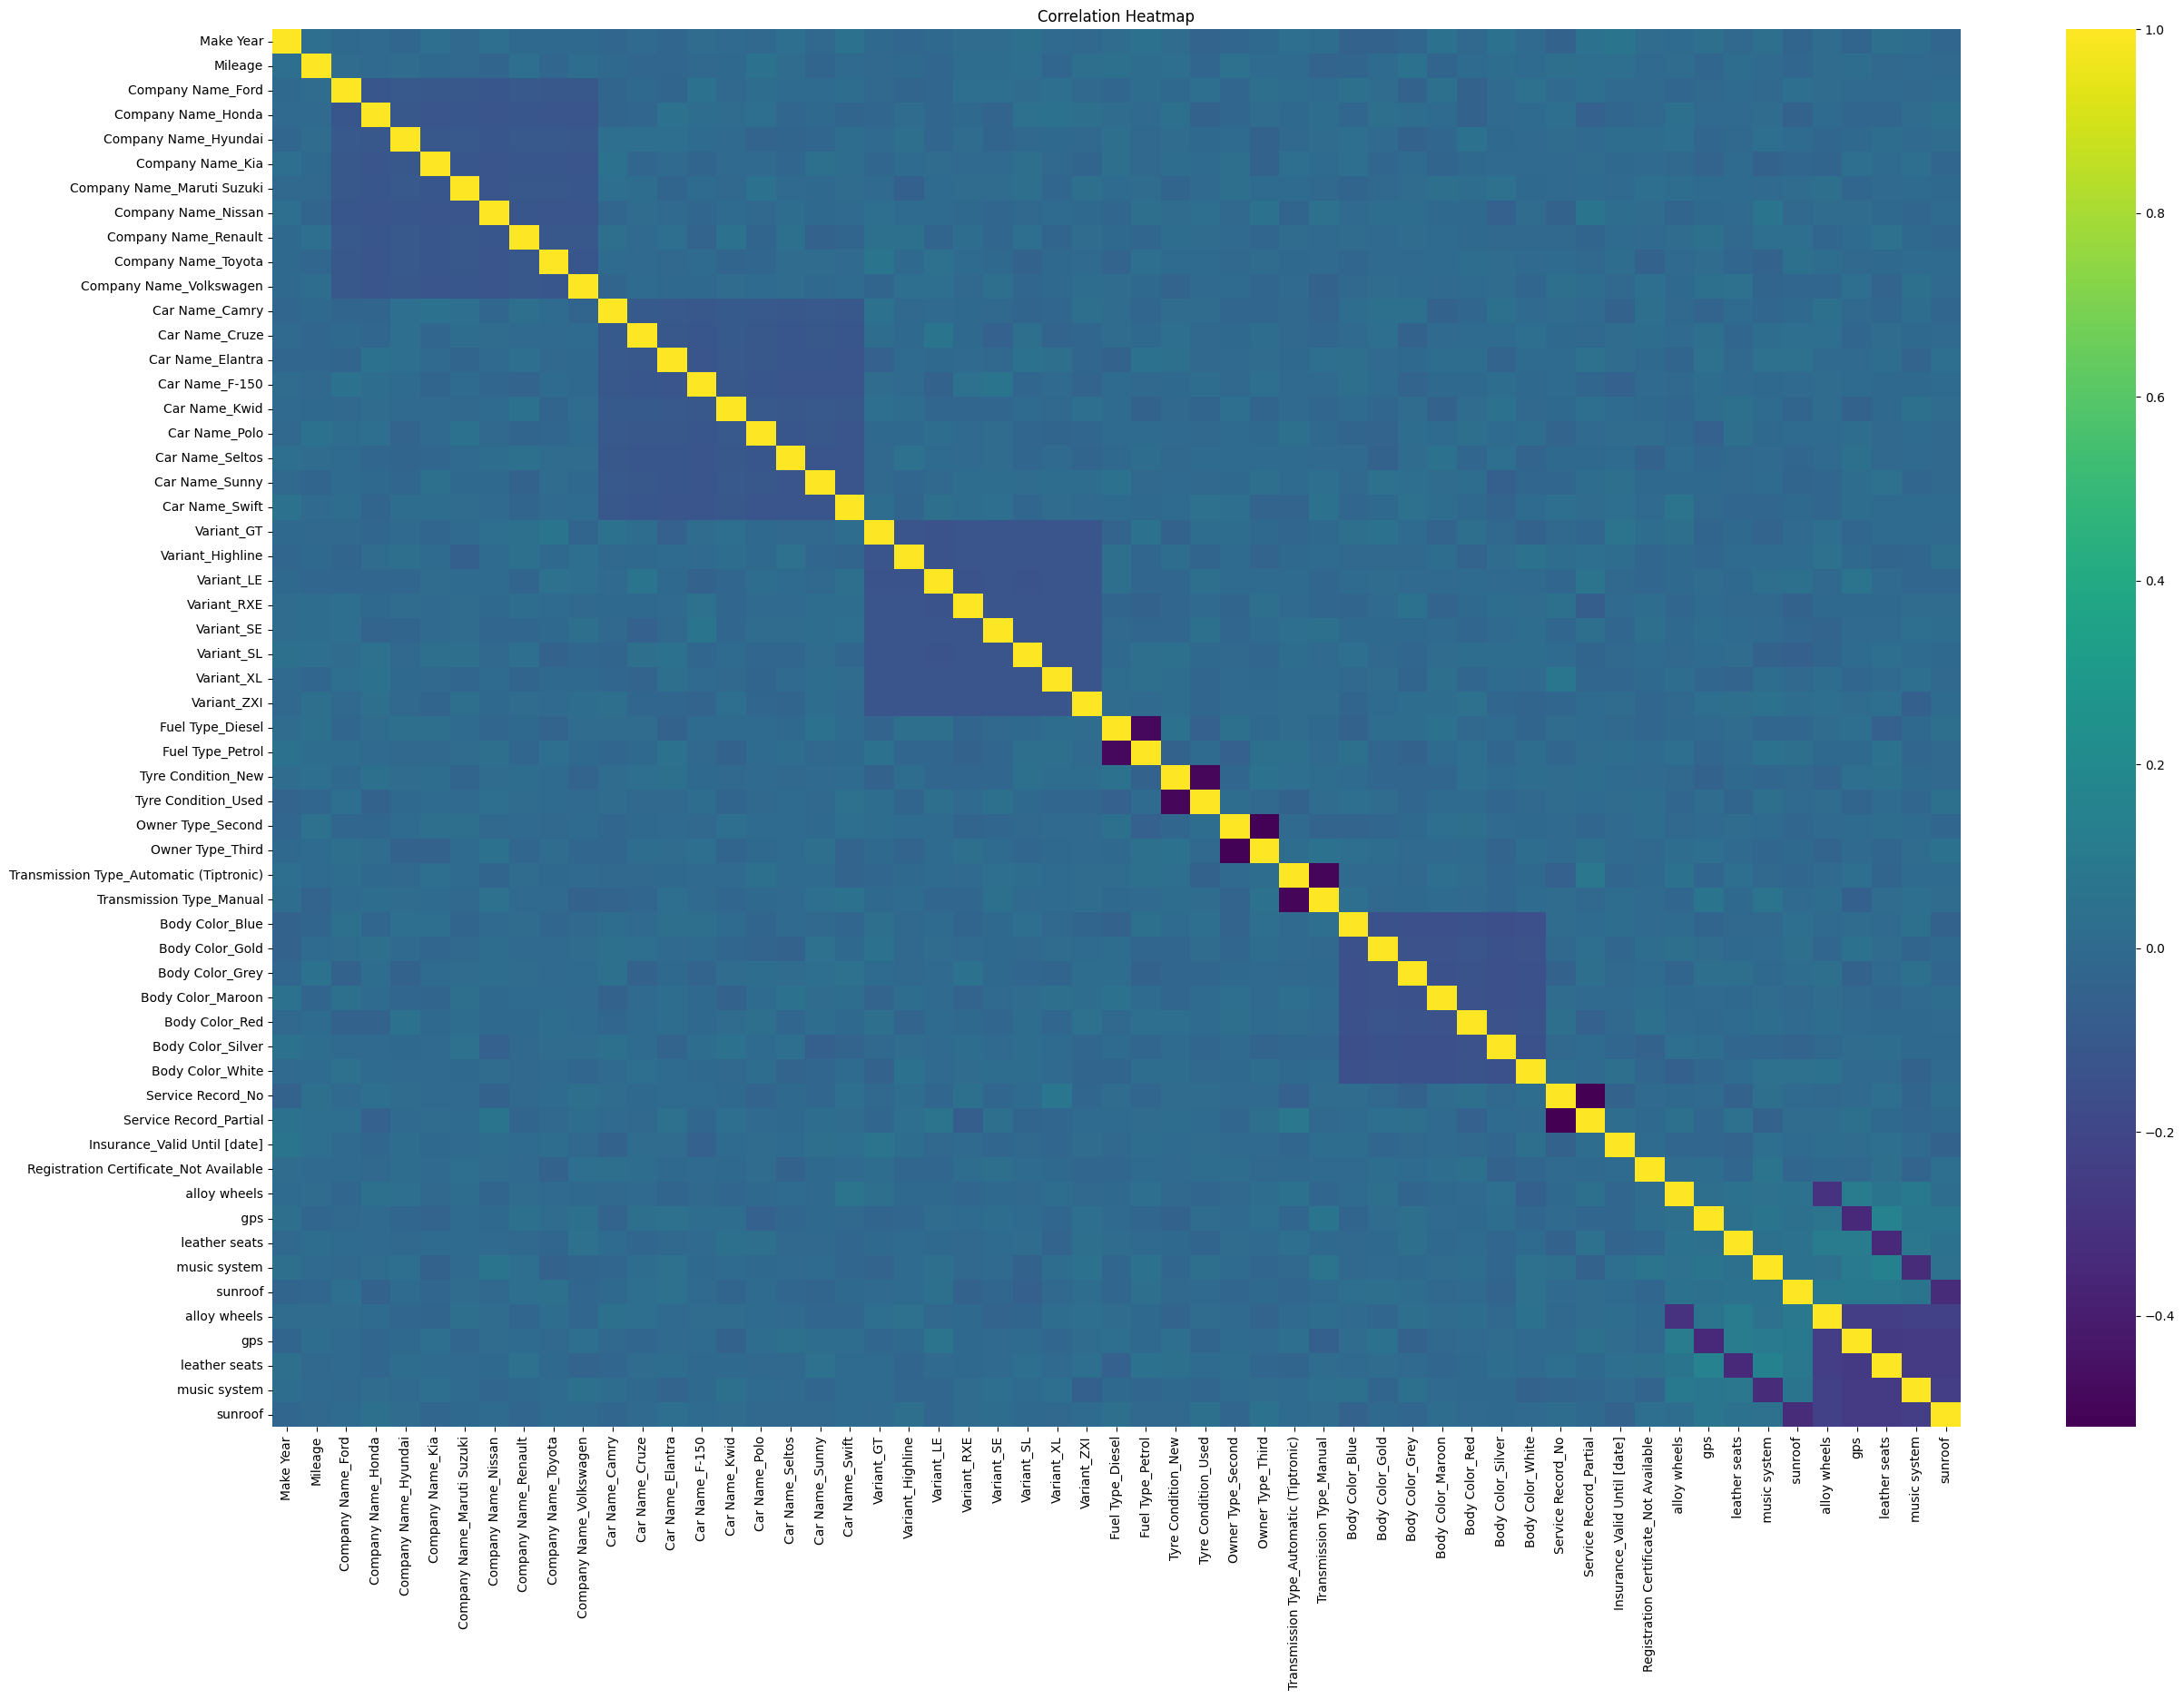

In [64]:
#Correlation heatmap to show multlinearity
plt.figure(figsize=(30, 20))
sns.heatmap(X_scaled.corr(), cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

**Dimensionality Reduction**

Principal Component Analysis

In [76]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA()
X_pca = pca.fit(X_scaled)

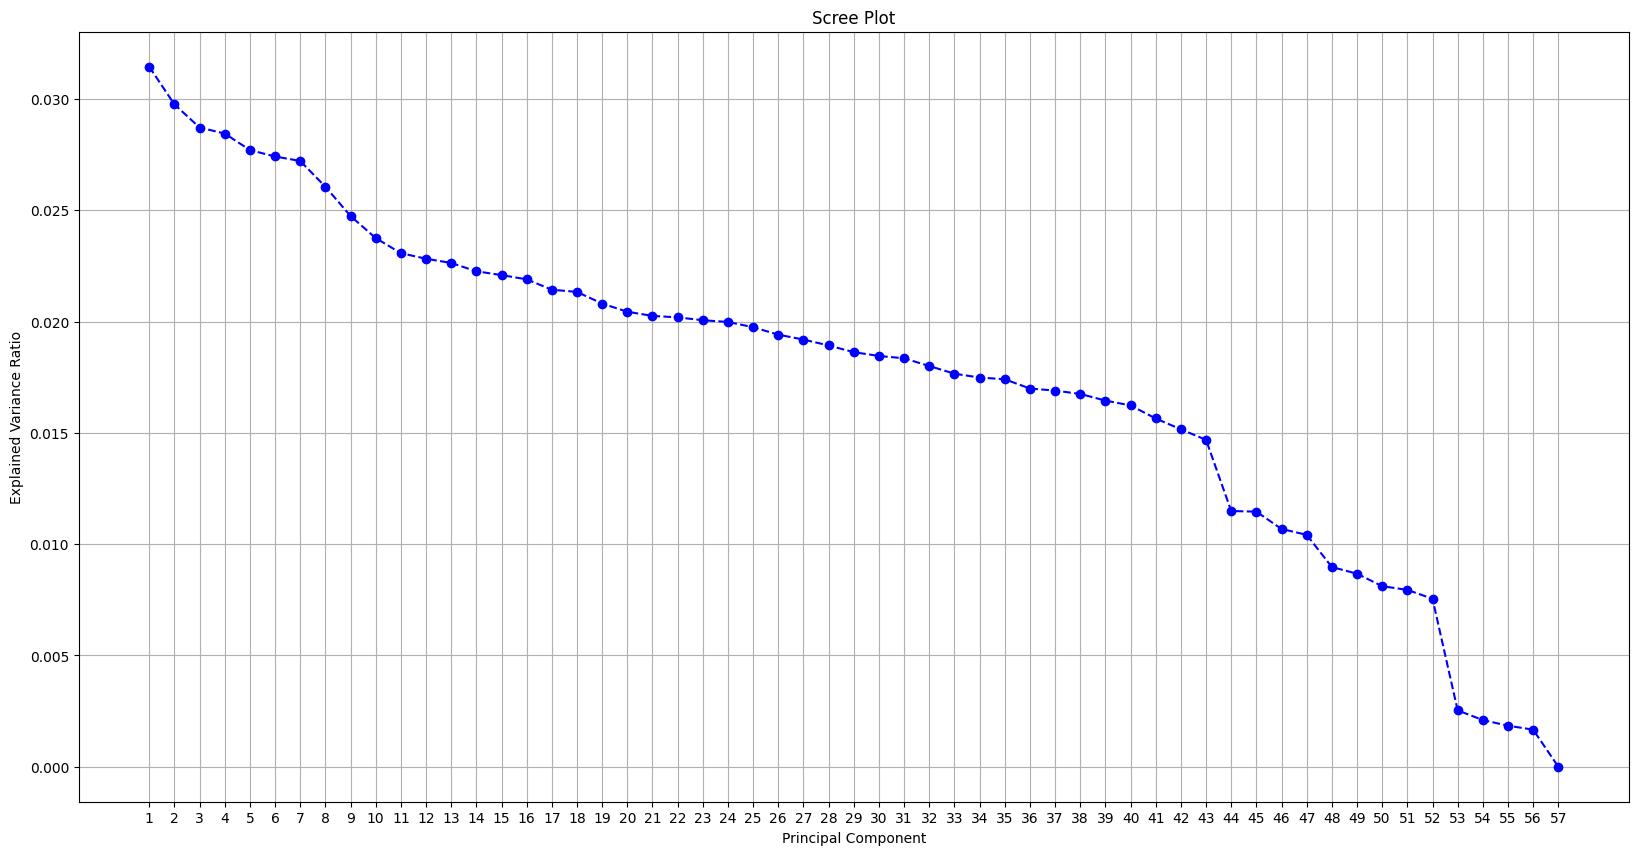

In [79]:
# Explained variance (eigenvalues)
variance_ratio = X_pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, len(variance_ratio) + 1), variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(variance_ratio) + 1))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Explained Variance vs N-Components')

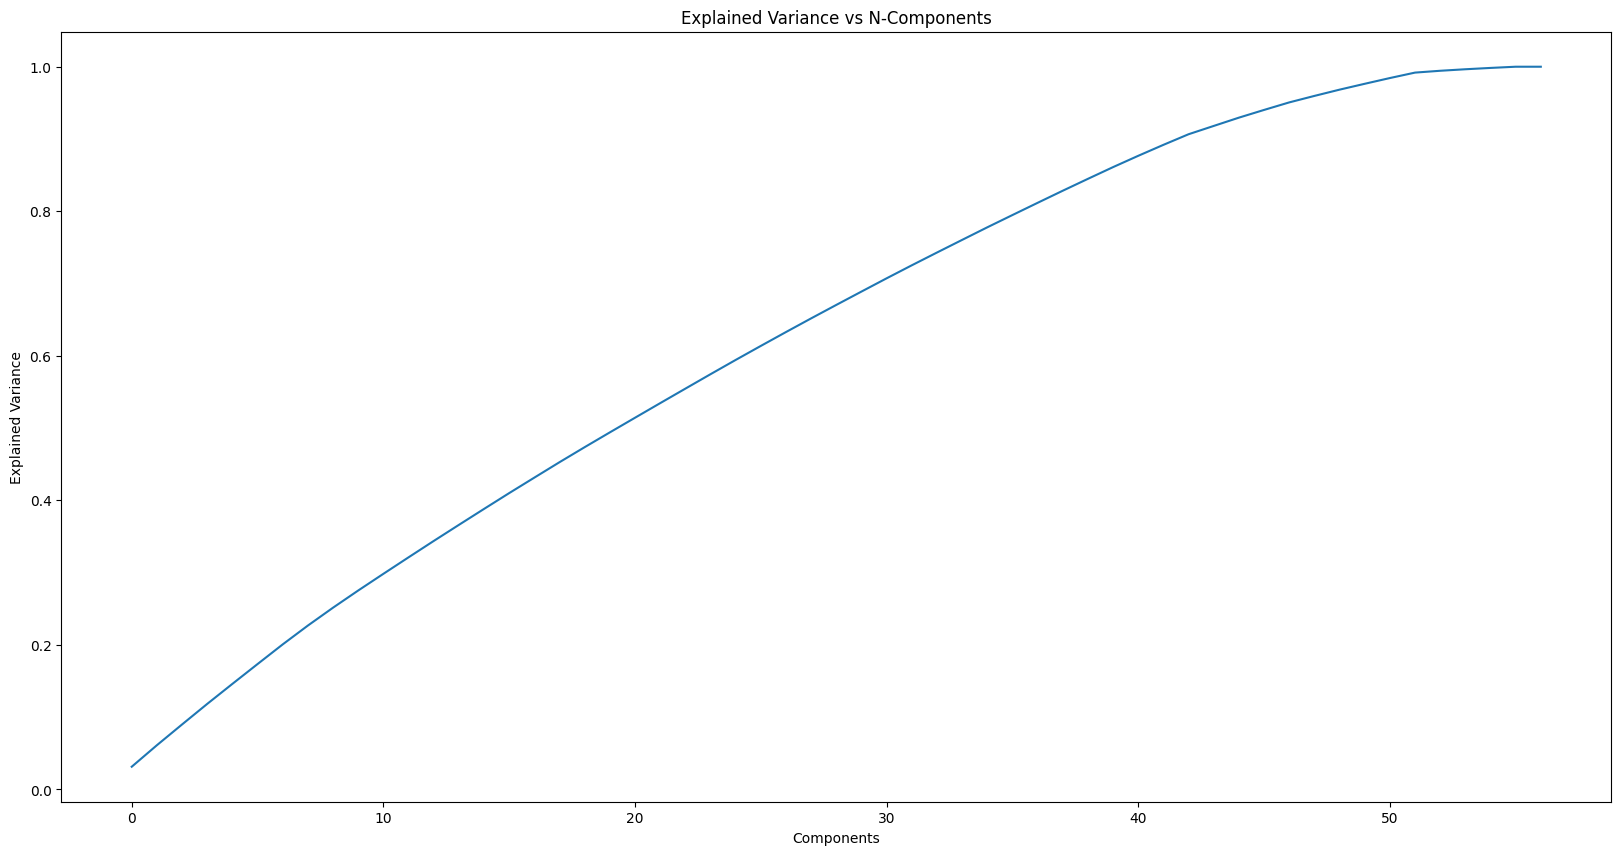

In [80]:
variance_ratio = X_pca.explained_variance_ratio_
components = np.arange(len(variance_ratio))

plt.figure(figsize= (20, 10))
plt.plot(components, np.cumsum(variance_ratio))
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.title('Explained Variance vs N-Components')

In [82]:
pca = PCA(n_components = 45)
X_pca = pca.fit_transform(X_scaled)

print('Original shape', X_scaled.shape)
print('Transformed shape', X_pca.shape)

Original shape (1814, 57)
Transformed shape (1814, 45)


In [84]:
y.mean()

609941.1052921719

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor,  RandomForestRegressor,  StackingRegressor
from sklearn.tree import DecisionTreeRegressor

Linear Regression

In [86]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
reg = make_pipeline(PolynomialFeatures(degree=3),LinearRegression())
scores = cross_val_score(reg, X_pca, y, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(reg, X_pca, y, cv=10, scoring='r2')
print(r2_scores.mean())
print(scores.mean()*-1)

-0.31014869153089614
68137530674.58766


In [105]:
g_reg = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, min_samples_split = 2, learning_rate= 0.01, random_state=0)
scores = cross_val_score(g_reg, X_pca, y, cv=10, scoring='neg_mean_squared_error').mean()*-1
r2_scores = cross_val_score(g_reg, X_pca, y, cv=10, scoring='r2')
print(r2_scores.mean())
print(scores)
print(np.sqrt(scores))

0.0016580761443827363
51968111274.688446
227965.15364127135


In [97]:
b_reg = BaggingRegressor(random_state=0, n_estimators=150, max_samples = 1.0)
scores = cross_val_score(b_reg, X_pca, y, cv=5, scoring='neg_mean_squared_error').mean()*-1
r2_scores = cross_val_score(b_reg, X_pca, y, cv=5, scoring='r2')
print(r2_scores.mean())
print(scores)

-0.023816788029177527
53321962623.48358
